## CS-613: Machine Learning
## HW3
### John Obuch

### Theory Part 1: Mathmatical Sanity Check
(_See Latex PDF file for full mathematical approach_)

In [1]:
#import requirement(s)
import timeit

#initialize notebook runtime
start = timeit.default_timer()

In [2]:
#import requirment(s)
import numpy as np

#create the covariance matrix
cov = [[1.0,.6851,.2575],[.6851,1.0,.1096],[.2575,.1096,1.0]]

#cast to a numpy array (matrix)
cov_array = np.array(cov)

#compute the eigen values and eigen vectors of the covariance matrix
val, vec = np.linalg.eig(cov_array)

#return the eigen values and eigen vectors to the screen
print('e-vals')
print(val)
print('e-vec')
print(vec)


e-vals
[1.77310989 0.2981575  0.92873261]
e-vec
[[ 0.68576517  0.71882181 -0.11411104]
 [ 0.65320651 -0.67699951 -0.33910606]
 [ 0.32100995 -0.15800905  0.93380177]]


In [3]:
import numpy as np

#define the x matrix
x = [[-2,1],[-5,-4],[-3,1],[0,3],[-8,11],[-2,5],[1,0],[5,-1],[-1,-3],[6,1]]

#cast to a numpy array (matrix)
x = np.array(x)

#compute the mean and standard deviation of the data
x_bar = np.mean(x, axis = 0)
x_std = np.std(x, axis = 0, ddof = 1)

#standardize the data
x_stdz = (x - x_bar)/x_std

#return the standardized data, mean, and standard deviation to the screen
print(x_stdz)
print(x_bar)
print(x_std)


[[-0.26015724 -0.09359019]
 [-0.96967699 -1.2634676 ]
 [-0.49666382 -0.09359019]
 [ 0.21285592  0.37436077]
 [-1.67919674  2.24616461]
 [-0.26015724  0.84231173]
 [ 0.44936251 -0.32756567]
 [ 1.39538884 -0.56154115]
 [-0.02365066 -1.02949211]
 [ 1.63189542 -0.09359019]]
[-0.9  1.4]
[4.22821213 4.27395211]


In [4]:
#define N
N = 10

#compute covariance matrix of standardized data
cov_mat = (x_stdz.T @ x_stdz)/(N-1)

#return covariance matrix to the screen
cov_mat


array([[ 1.        , -0.40826218],
       [-0.40826218,  1.        ]])

In [5]:
#compute eigen values and eigen vecotors of the standardized covariance matrix
val, vec = np.linalg.eig(cov_mat)
print(val)
print(vec)

[1.40826218 0.59173782]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [6]:
#negate the eigen vecors to change the sign (note the sign in this case does not matter)
vec[:,0] = vec[:, 0]* -1

#return the vectors to the screen
print(vec)

[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


In [7]:
#project the data onto the best principle component 
Z = x_stdz @ vec[:,0]

#return the projection results
print(Z)

[ 0.11778069 -0.20774133  0.2850161   0.11420117  2.77564963  0.77956329
 -0.54937118 -1.38375847 -0.71123731 -1.22010258]


### Theory Part 2        

(_See Latex PDF file for full mathematical approach_)

Projected data:

[-0.26444347 -1.03061487 -0.50066411  0.23100161 -1.56674837 -0.21843588
  0.43271657  1.36609725 -0.0742304   1.62532168]


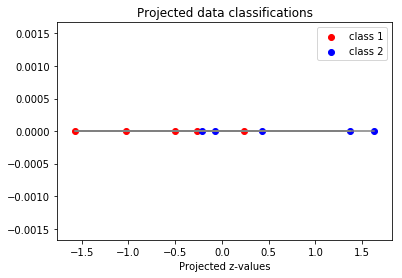

In [8]:
#part 2c
#import module requirements
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#the original data (Note: the first 5 rows are assumed to be class 1 and the remaining 5 rows are assumed to be class 2)
c = np.array([[-2,1],[-5,-4],[-3,1],[0,3],[-8,11],[-2,5],[1,0],[5,-1],[-1,-3],[6,1]])

#standardize the whole data
m = np.mean(c, axis = 0)
s = np.std(c, axis = 0, ddof = 1)
c = (c - m)/s

#seperate the classes
c1 = c[:5,:]
c2 = c[5:,:]

#compute sample size of each class
n1 = c1.shape[0]
n2 = c2.shape[0]

#compute mean of each class
m1 = np.mean(c1, axis = 0)
m2 = np.mean(c2, axis = 0)

#zero center the data of each class
c1 = c1 - m1
c2 = c2 - m2

#reshape the means of the classes to be column vectors to perform matrix ops
m1 = np.reshape(m1, (m1.shape[0], 1))
m2 = np.reshape(m2, (m2.shape[0], 1))

#compute sigma squared for each class
s1_sqrd = (n1 - 1) * ((c1.T @ c1)/(n1-1))
s2_sqrd = (n2 - 1) * ((c2.T @ c2)/(n2-1))

#compute sw
sw = s1_sqrd + s2_sqrd

#compute sw inverse
sw_inv = np.linalg.inv(sw)

#compute s_b
sb = (m1 - m2).T * (m1 - m2)

#compute M matrix --> sw_inv @ sb (dot product)
M = sw_inv @ sb

#compute eigen values and eigen vectors (i.e. eigen decomposition)
val, vec = np.linalg.eig(M)

#edintify the index position corresponding to the best e-val (i.e. non-zero eigen-value)
for i in range(val.shape[0]):
    if val[i] == np.max(val):
        best_eig_val_indx = i

#compute the best w vector (i.e. the vector associated with the non-zero eigen-value)
w = vec[:, best_eig_val_indx]

#project each data point onto the vector (shape of z is (n,))
z = c @ w

#return the projected data values to the screen
print("Projected data:\n")
print(z)

#create y vector to plot and visualize the projected classification results (shape of y is (n,))
y = np.zeros(z.shape[0])

#seperate the projected data into their respective classes
z_c1 = z[:n1] 
y_c1 = y[:n1] ##class 1

z_c2 = z[n1:]
y_c2 = y[n1:] ##class 2

#visualize the results by plotting the projected classifications
_ = plt.plot(z, y, color = 'gray')
_ = plt.scatter(z_c1, y_c1, color = 'red', label = 'class 1')
_ = plt.scatter(z_c2, y_c2, color = 'blue', label = 'class 2')
_ = plt.title("Projected data classifications")
_ = plt.xlabel("Projected z-values")
_ = plt.legend(loc = 'upper right')


### Part 2: Dimensionality Reduction via PCA

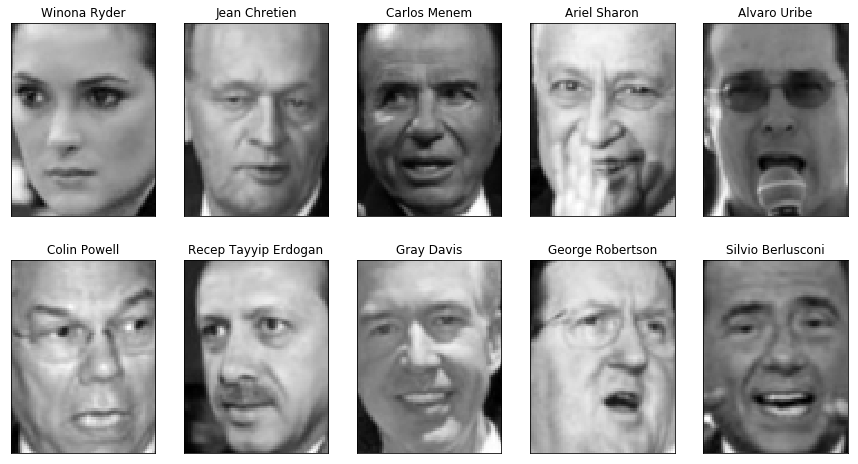

In [9]:
#Import the data
from sklearn.datasets import fetch_lfw_people 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7) 
image_shape = people.images[0].shape
fig, axes = plt.subplots(2, 5, figsize=(15, 8), 
                         subplot_kw={'xticks' : (), 'yticks' : ()}) 
for target, image, ax in zip(people.target, people.images, axes.ravel()): 
    ax.imshow(image, cmap=cm.gray) 
    ax.set_title(people.target_names[target])

In [10]:
#Verify that you have the correct number of people and classes
print("people.images.shape : {}".format(people.images.shape)) 
print ("Number of classes : {}".format(len(people.target_names)))

people.images.shape : (3023, 87, 65)
Number of classes : 62


In [11]:
#import requirement(s)
import numpy as np

# count how often each target appears 
counts = np.bincount(people.target)

# print counts next to target names 
for i, (count, name) in enumerate(zip(counts, people.target_names)): 
    print ("{0:25} {1:3}".format(name, count), end='') 
    if (i + 1) % 3 == 0: 
        print ()

Alejandro Toledo           39Alvaro Uribe               35Amelie Mauresmo            21
Andre Agassi               36Angelina Jolie             20Ariel Sharon               77
Arnold Schwarzenegger      42Atal Bihari Vajpayee       24Bill Clinton               29
Carlos Menem               21Colin Powell              236David Beckham              31
Donald Rumsfeld           121George Robertson           22George W Bush             530
Gerhard Schroeder         109Gloria Macapagal Arroyo    44Gray Davis                 26
Guillermo Coria            30Hamid Karzai               22Hans Blix                  39
Hugo Chavez                71Igor Ivanov                20Jack Straw                 28
Jacques Chirac             52Jean Chretien              55Jennifer Aniston           21
Jennifer Capriati          42Jennifer Lopez             21Jeremy Greenstock          24
Jiang Zemin                20John Ashcroft              53John Negroponte            31
Jose Maria Aznar           23Jua

In [12]:
#To make the data less skewed, we will only take up to 50 images of each person 
#(otherwise, the feature extraction would be overwhelmed by the likelihood of George W. Bush)

mask = np.zeros(people.target.shape, dtype=np.bool) 
for target in np.unique(people.target): 
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask] 
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1 instead of 0 and 255 for better numeric stability 
X_people = X_people/255.

In [13]:
#Examine X and Y data
print(X_people)
print(y_people)

[[0.22352941 0.23660131 0.30588236 ... 0.06797386 0.06535947 0.08888888]
 [0.2614379  0.31633985 0.3477124  ... 0.03398693 0.03267974 0.03660131]
 [0.07320261 0.05620915 0.05882353 ... 0.08888888 0.08888888 0.10065359]
 ...
 [0.14248365 0.0875817  0.10980392 ... 0.05620915 0.02614379 0.02091503]
 [0.21176471 0.25620916 0.22091503 ... 0.82222223 0.8235294  0.8326797 ]
 [0.43398693 0.50326794 0.5699346  ... 0.05490196 0.05490196 0.05359477]]
[61 25  9 ...  9 37 22]


In [14]:
#We are now going to compute how well a KNN classiﬁer does using just the pixels alone
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state=0)

# build a KNeighborsClassifier using one neighbor 
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_train, y_train) 

print("Test set score of 1−nn: {}".format(knn.score(X_test, y_test)))

Test set score of 1−nn: 0.23255813953488372


### Create KNN

In [15]:
#define L2 distance function
def Compute_Euclidean_Distance(vec1, vec2):
    
    '''This function takes in two vectors 
    and computes the Euclidean distance between v1 and v2'''
    
    dist = np.sum((vec1 - vec2)**2)
    
    return np.sqrt(dist) #return the squar root of the sum of squares

In [16]:
#import requirment(s)
from collections import Counter

#define class prediction function for KNN
def Predict_Class(train_data, test_row, k):
    
    '''This function returns the k-nearest neigbors and takes in the following parameters:
    1) training data set X
    2) refference vector
    3) the number of neigbors k'''
    
    #create empty list to store row vectors and distances
    dist_list = []
    
    #for each row, compute the Euclidean distance between the refference vector
    for indx, row in enumerate(train_data):
        dist = Compute_Euclidean_Distance(test_row, row)
        dist_list.append((indx, row, dist)) 
        
    #sort the list of tuples by distance smallest to largest
    dist_list.sort(key = lambda x : x[2])
    
    #creat empty list to store the k neigbors and associated indicies into
    neigbors = []
    for i in range(k):
        
        #append the index position and nearest neigbor
        neigbors.append((dist_list[i][0]))
        
    #obtain the y-label associated to the each neigbors index position and append the prediction to the pred list
    pred = []
    for lable_indx in neigbors:
        prediction = y_train[lable_indx]
        pred.append(prediction)

    return Counter(pred).most_common()[0][0]
    

In [17]:
def KNN(train_data, test_data, k):
    
    '''This function takes in training data and a test vector and performs KNN
    for a given k.'''
    
    #create empty list to store predictions into
    predictions = []
    
    #predict the class based on distance heuristic against each test data and append to the list
    for row in test_data:
        pred = Predict_Class(train_data, row, k)
        predictions.append(pred)
    
    return(predictions) #return the predictions

In [18]:
#define y_hat variable to store predicted values
y_hat = KNN(X_train, X_test, k=1)

In [19]:
#define function to compute the accuracy of the KNN model
def Compute_Accuracy(y_hat, y_test):
    
    '''This function takes in Y prediction values and the original Y_test data
    and computes the accuracy of the model where accuracy is defined as the number
    of correct classifications devided by the total number of records in the Y_test vector'''
    
    #initialize count of class matches
    cnt = 0
    
    #for each prediction, check to see if the prediction matches the actual outcome value
    for i in range(len(y_hat)):
        if y_hat[i] == y_test[i]:
            cnt += 1 #if yes, incriment the count
            
    #compute the accuracy
    accuracy = cnt/len(y_test)
    
    return accuracy #return the accuracy

In [20]:
#compute the accuracy of my KNN
acc = Compute_Accuracy(y_hat, y_test)

#return the accuracy result to the screen
print("Accuracy: " +str(acc))

Accuracy: 0.23255813953488372


#### Perform KNN on reduced dimentions (100D)

In [21]:
#compute mean and standard deviation of training data
Mu_train = np.mean(X_train, axis = 0)
Sigma_train = np.std(X_train, axis = 0, ddof = 1)

#Standardize the data
X_train_stdz = (X_train - Mu_train)/Sigma_train
X_test_stdz = (X_test - Mu_train)/Sigma_train

#Reduces the data to 100D 
X_train_cov = (X_train_stdz.T @ X_train_stdz) / (X_train_stdz.shape[0] - 1)

#Compute the eigen values and eigen vectors of the covariance matrix
e_val, e_vec = np.linalg.eig(X_train_cov)

#keep track of orignal index position to obtain associated eigen vectors
indx_val_list = []
for indx, elem in enumerate(e_val):
    indx_val_list.append((indx, elem)) 
      
#sort the eigen values from largest to smallest
indx_val_list.sort(key = lambda x : x[1], reverse=True)

#get the indices associated to larges e-vals from sorted evals above
best_vec_indx = []
srtd_evals = []
for item in indx_val_list:
    best_vec_indx.append(item[0])
    srtd_evals.append(item[1])

#get the top 100 eigen values and eigen vectors
best_100_vecs = []
best_100_evals = []
for i in range(len(best_vec_indx)):
    if i < 100:
        best_100_vecs.append(e_vec[:, best_vec_indx[i]])
        best_100_evals.append(srtd_evals[i])
        
#cast to a numpy array
best_100_vecs = np.array(best_100_vecs).T
best_100_evals = np.array(best_100_evals)
best_100_evals = np.reshape(best_100_evals, (1, best_100_evals.shape[0]))

#project the original X_train_stdz and X_test_stdz data onto the 100 principle components
W = best_100_vecs
Z_train = X_train_stdz @ W
Z_test = X_test_stdz @ W

#Compute KNN on the 100D 
y_hat_100 = KNN(Z_train, Z_test, k=1)

#Compute Accuracy
acc = Compute_Accuracy(y_hat_100, y_test)

#return the accuracy result to the screen
print("Accuracy: " +str(acc))


Accuracy: 0.25387596899224807


#### Whiten the data and perform KNN

In [22]:
######## THE WHITENING EQUATION ########
# w = lambda^-1/2 Phi.T X 
#(lambda = evals, Phi = evecs, X = data)
########################################

#compute the square root of the best 100 eigen values
sqrt_eig_vals = np.sqrt(best_100_evals)

#whiten the data
Z_train_white = Z_train/sqrt_eig_vals
Z_test_white = Z_test/sqrt_eig_vals

#perfrom KNN on the whitened data
y_hat_white = KNN(Z_train_white, Z_test_white, k=1)

#compute the accuracy
acc = Compute_Accuracy(y_hat_white, y_test)

#return the accuracy results to the screen
print('Accuracy: '+str(acc))


Accuracy: 0.3313953488372093


#### Reduce to 2D PCA and Plot Results

In [23]:
#import requirement(s)
from matplotlib import pyplot as plt
% matplotlib inline

#compute mean and standard deviation of training data
Mu_train = np.mean(X_train, axis = 0)
Sigma_train = np.std(X_train, axis = 0, ddof = 1)

#Standardize the data
X_train_stdz = (X_train - Mu_train)/Sigma_train
X_test_stdz = (X_test - Mu_train)/Sigma_train

#Reduces the data to 100D 
X_train_cov = (X_train_stdz.T @ X_train_stdz) / (X_train_stdz.shape[0] - 1)

#Compute the eigen values and eigen vectors of the covariance matrix
e_val, e_vec = np.linalg.eig(X_train_cov)

#keep track of orignal index position to obtain associated eigen vectors
indx_val_list = []
for indx, elem in enumerate(e_val):
    indx_val_list.append((indx, elem)) 
      
#sort the eigen values from largest to smallest
indx_val_list.sort(key = lambda x : x[1], reverse=True)

#get the indices associated to largest e-vals from sorted evals above
best_vec_indx = []
srtd_evals = []
for item in indx_val_list:
    best_vec_indx.append(item[0])
    srtd_evals.append(item[1])

#get the top 2 eigen values and eigen vectors
best_2_vecs = []
best_2_evals = []
for i in range(len(best_vec_indx)):
    if i < 2:
        best_2_vecs.append(e_vec[:, best_vec_indx[i]])
        best_2_evals.append(srtd_evals[i])
        
#cast to a numpy array
best_2_vecs = np.array(best_2_vecs).T
best_2_evals = np.array(best_2_evals)

#project the original X_train_stdz and X_test_stdz data onto the 100 principle components
W = best_2_vecs
Z_train = X_train_stdz @ W
Z_test = X_test_stdz @ W

#transform back to original space (i.e. eigen space --> original space)
x_hat_train = Z_train @ W.T
x_hat_test = Z_test @ W.T


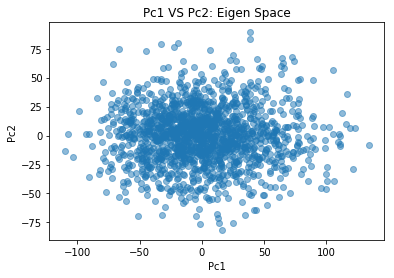

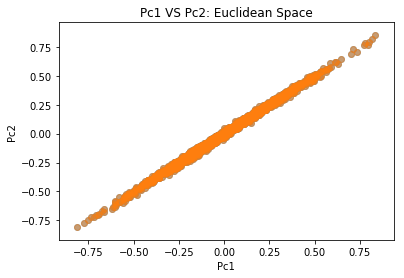

In [24]:
#Plot the data in the eigen space 
x1 = Z_train[:, 0]
x2 = Z_train[:, 1]
_= plt.scatter(x1, x2, alpha = .5)
_= plt.title("Pc1 VS Pc2: Eigen Space")
_= plt.xlabel("Pc1")
_= plt.ylabel("Pc2")
_= plt.show()

#Plot the data in the euclidean space
x1 = x_hat_train[:, 0]
x2 = x_hat_train[:, 1]
_= plt.scatter(x1, x2, alpha = .5)
_= plt.scatter(x1, x2, alpha = .5)
_= plt.title("Pc1 VS Pc2: Euclidean Space")
_= plt.xlabel("Pc1")
_= plt.ylabel("Pc2")
_= plt.show()


### Part 3: Eigen Faces

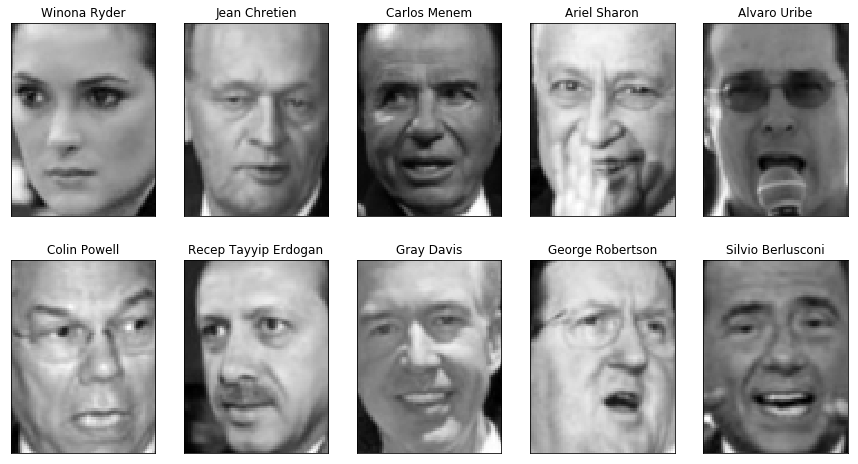

In [25]:
#import requirements
from sklearn.datasets import fetch_lfw_people 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
%matplotlib inline
import numpy as np

#Import the data
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7) 
image_shape = people.images[0].shape
fig, axes = plt.subplots(2, 5, figsize=(15, 8), 
                         subplot_kw={'xticks' : (), 'yticks' : ()}) 
for target, image, ax in zip(people.target, people.images, axes.ravel()): 
    ax.imshow(image, cmap=cm.gray) 
    ax.set_title(people.target_names[target])
    
#To make the data less skewed, we will only take up to 50 images of each person 
#(otherwise, the feature extraction would be overwhelmed by the likelihood of George W. Bush)
mask = np.zeros(people.target.shape, dtype=np.bool) 
for target in np.unique(people.target): 
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask] 
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1 instead of 0 and 255 for better numeric stability 
X_people = X_people/255.

# split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state=0)

#compute the mean and standard deviation of the X_train data
X_mu = np.mean(X_train, axis = 0)
X_sigma = np.std(X_train, axis = 0, ddof =1)

# standardize the data
X_train_stdz = (X_train - X_mu)/X_sigma
X_test_stdz = (X_test - X_mu)/X_sigma

#### Perform PCA on the data

Max image on Pc1: 134.14108
Min image on Pc1: -110.21942
Max image on Pc2: 89.19568
Min immage on Pc2: -81.47462


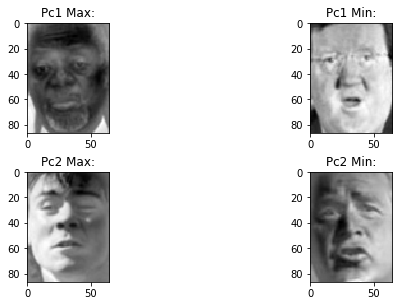

In [26]:
#compute the covariance matrix of the training data
X_cov = (X_train_stdz.T @ X_train_stdz)/(X_train_stdz.shape[0] - 1)

#Compute the eigen values and eigen vectors of the covariance matrix
e_val, e_vec = np.linalg.eig(X_train_cov)

#keep track of orignal index position to obtain associated eigen vectors in a tuple
indx_val_list = []
for indx, elem in enumerate(e_val):
    indx_val_list.append((indx, elem)) 
      
#sort the eigen values from largest to smallest
indx_val_list.sort(key = lambda x : x[1], reverse=True)

#get the indices associated to larges e-vals from sorted evals above and also obtain the values themselves
best_vec_indx = []
srtd_evals = []
for item in indx_val_list:
    best_vec_indx.append(item[0])
    srtd_evals.append(item[1])

#get the sorted eigen vectors
srtd_vecs = []
for i in range(len(best_vec_indx)):
    srtd_vecs.append(e_vec[:, best_vec_indx[i]])
        
#cast to a numpy array
srtd_vecs = np.array(srtd_vecs).T
srtd_evals = np.array(srtd_evals)

#project the original X_train_stdz and X_test_stdz data onto the principle component axes
W = srtd_vecs
Z_train = X_train_stdz @ W
Z_test = X_test_stdz @ W

#get the projected images on Pc1 and Pc2 axes
pc1_train = Z_train[:, 0]
pc2_train = Z_train[:, 1] #train

pc1_test = Z_test[:, 0] #test
pc2_test = Z_test[:, 1]

#find the max and min projected training images on pc1 and pc2
max_image_pc1_train = max(pc1_train)
min_image_pc1_train = min(pc1_train) #pc1

max_image_pc2_train = max(pc2_train) #pc2
min_image_pc2_train = min(pc2_train)

#return the min/max results of pc1 and pc2 to the screen
print("Max image on Pc1: " + str(max_image_pc1_train))
print("Min image on Pc1: " + str(min_image_pc1_train))
print("Max image on Pc2: " + str(max_image_pc2_train))
print("Min immage on Pc2: " + str(min_image_pc2_train))

#locate the images corresponding to the min and max projected values
for indx, elem in enumerate(pc1_train):
    if elem == max_image_pc1_train:
        X_train_max1 = X_train_stdz[indx, :] #pc1
    elif elem == min_image_pc1_train:
        X_train_min1 = X_train_stdz[indx, :]
        
for indx, elem in enumerate(pc2_train):
    if elem == max_image_pc2_train:
        X_train_max2 = X_train_stdz[indx, :] #pc2
    elif elem == min_image_pc2_train:
        X_train_min2 = X_train_stdz[indx, :]

#reshape the images
max_im_p1 = np.reshape(X_train_max1, (87, 65)) #pc1
min_im_p1 = np.reshape(X_train_min1, (87, 65))

max_im_p2 = np.reshape(X_train_max2, (87, 65)) #pc2
min_im_p2 = np.reshape(X_train_min2, (87, 65))

#plot and report the min/max faces
_= plt.subplots_adjust(bottom=0, left=.1, right=1.3, top=.90, hspace=.35) #adjust the image seperation

_= plt.subplot(221)
_= plt.imshow(max_im_p1, cmap=cm.gray)
_= plt.title("Pc1 Max:")

_= plt.subplot(222)
_= plt.imshow(min_im_p1, cmap=cm.gray)
_= plt.title("Pc1 Min:")

_= plt.subplot(223)
_= plt.imshow(max_im_p2, cmap=cm.gray)
_= plt.title("Pc2 Max:")

_= plt.subplot(224)
_= plt.imshow(min_im_p2, cmap=cm.gray)
_= plt.title("Pc2 Min:")


#### What variation do these components capture?

##### __Response:__
These variation components capture the tails of the distribution of the data projected on each of the principle components. These components also allow us to gleam insight into the spread of the data. We can think of these as the extreme cases of the distribution of projected images.

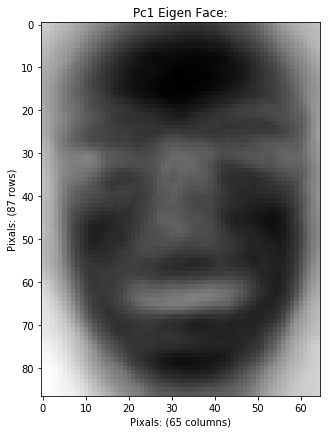

In [27]:
#reshape the most import principle component
pc1_train_87x65 = np.reshape(W[:,0], (87, 65))

#visualize the most import principle component
_= plt.figure(figsize=(5,10))
_= plt.imshow(pc1_train_87x65, cmap=cm.gray)
_= plt.title("Pc1 Eigen Face:")
_= plt.xlabel("Pixals: (65 columns)")
_= plt.ylabel("Pixals: (87 rows)")


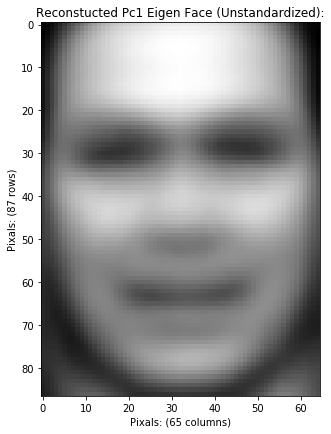

In [28]:
##Reconstruct X[0, :] using Pc1 (i.e., reconstruct the primary principle component)

#reconstruct by rotating back into Euclidean space
Pc1_recon = Z_train @ W[:, 0].T

#reshape the vector
Pc1_recon = np.reshape(Pc1_recon, (Pc1_recon.shape[0],1))

#unstandardize the vector
Pc1_rec_unstdz = Pc1_recon * X_sigma + X_mu

#reshape the image to be dimensions 87x65
X0_87x65 = np.reshape(Pc1_rec_unstdz[0, :], (87,65))

#visualize the reconstructed principle component
_= plt.figure(figsize=(5,10))
_= plt.imshow(X0_87x65, cmap=cm.gray)
_= plt.title("Reconstucted Pc1 Eigen Face (Unstandardized):")
_= plt.xlabel("Pixals: (65 columns)")
_= plt.ylabel("Pixals: (87 rows)")


In [29]:
#determine the number of principle components needed to encode at least 95% of the information, k.
k = 0
percent = 0
sum_lambda = np.sum(srtd_evals)
for i in range(srtd_evals.shape[0]):
    percent = np.sum(srtd_evals[0:i])/sum_lambda
    k += 1
    if (percent >= (95/100)):
        break
        
print("The number of principle components needed to encode 95% of the information is: "+str(k))

The number of principle components needed to encode 95% of the information is: 190


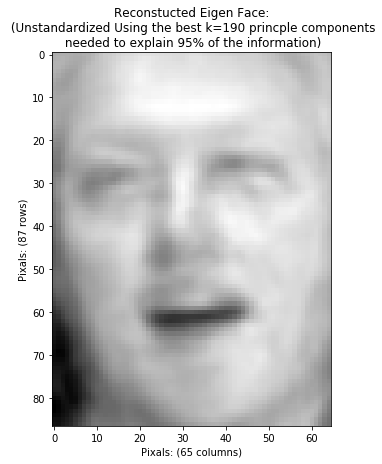

In [30]:
#reconstruct by rotating back into Euclidean space
Pc190_recon = Z_train[:, 0:k] @ W[:, 0:k].T

#unstandardize the vector
Pc190_rec_unstdz = Pc190_recon * X_sigma + X_mu

#reshape the image to be dimensions 87x65
X0_190_87x65 = np.reshape(Pc190_rec_unstdz[0, :], (87,65))

#visualize the result
_= plt.figure(figsize=(5,10))
_= plt.imshow(X0_190_87x65, cmap=cm.gray)
_= plt.title("Reconstucted Eigen Face:\n (Unstandardized Using the best k=190 princple components\n needed to explain 95% of the information)")
_= plt.xlabel("Pixals: (65 columns)")
_= plt.ylabel("Pixals: (87 rows)")


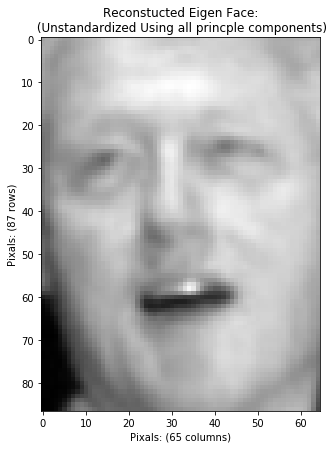

In [31]:
#For Fun... 

#Reconstruct the X[0, :] immage using ALL the principle components
pc_all_recon = Z_train @ W.T

#unstandardize the data
pc_all_rec_unstdz = pc_all_recon * X_sigma + X_mu

#reshape the data to image dimension specifications
X0_all_87x65 = np.reshape(pc_all_rec_unstdz[0, :], (87,65))

#visualize the result
_= plt.figure(figsize=(5,10))
_= plt.imshow(X0_all_87x65, cmap=cm.gray)
_= plt.title("Reconstucted Eigen Face:\n (Unstandardized Using all princple components)")
_= plt.xlabel("Pixals: (65 columns)")
_= plt.ylabel("Pixals: (87 rows)")


### Part 4: Clustering

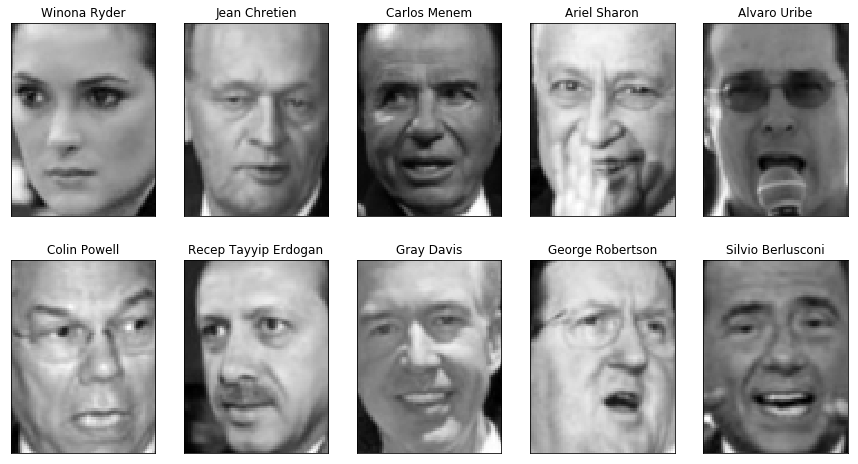

In [32]:
#import requirments
from sklearn.datasets import fetch_lfw_people 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
%matplotlib inline
import numpy as np
import random

#Import the data
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7) 
image_shape = people.images[0].shape
fig, axes = plt.subplots(2, 5, figsize=(15, 8), 
                         subplot_kw={'xticks' : (), 'yticks' : ()}) 
for target, image, ax in zip(people.target, people.images, axes.ravel()): 
    ax.imshow(image, cmap=cm.gray) 
    ax.set_title(people.target_names[target])
    
#To make the data less skewed, we will only take up to 50 images of each person 
#(otherwise, the feature extraction would be overwhelmed by the likelihood of George W. Bush)
mask = np.zeros(people.target.shape, dtype=np.bool) 
for target in np.unique(people.target): 
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask] 
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1 instead of 0 and 255 for better numeric stability 
X_people = X_people/255.


###  Create K-Means

In [33]:
#define function to compute the L2 Norm or Euclidean distance between two vectors
def Compute_L2_Distance(vec1, vec2):
    
    '''This function takes in two vectors 
    and computes the Euclidean distance between v1 and v2'''
    
    dist = np.sum((vec1 - vec2)**2)
    
    return np.sqrt(dist) #return the square root of the sum of squares

#### Standardize the data and perform PCA

In [34]:
#compute mean and standard deviation of the data
X_mu = np.mean(X_people, axis = 0)
X_sigma = np.std(X_people, axis = 0, ddof = 1)

#standardize the data
X_stdz = (X_people - X_mu)/X_sigma

#reduce the data to 100D using PCA
X_cov = (X_stdz.T @ X_stdz)/(X_stdz.shape[0] - 1)

#Compute the eigen values and eigen vectors of the covariance matrix
e_val, e_vec = np.linalg.eig(X_cov)

#keep track of orignal index position to obtain associated eigen vectors
indx_val_list = []
for indx, elem in enumerate(e_val):
    indx_val_list.append((indx, elem)) 
      
#sort the eigen values from largest to smallest
indx_val_list.sort(key = lambda x : x[1], reverse=True)

#get the indices associated to largest e-vals from sorted evals above
best_vec_indx = []
srtd_evals = []
for item in indx_val_list:
    best_vec_indx.append(item[0])
    srtd_evals.append(item[1])

#get the top 100 eigen values and eigen vectors
best_100_vecs = []
best_100_evals = []
for i in range(len(best_vec_indx)):
    if i < 100:
        best_100_vecs.append(e_vec[:, best_vec_indx[i]])
        best_100_evals.append(srtd_evals[i])
        
#cast to a numpy array
best_100_vecs = np.array(best_100_vecs).T
best_100_evals = np.array(best_100_evals)
best_100_evals = np.reshape(best_100_evals, (1, best_100_evals.shape[0]))

#project the original X_stdz data onto the 100 principle components
W = best_100_vecs
Z = X_stdz @ W

#### Perform K-Means Clustering until convergence criteria is met

In [35]:
#define the number of clusters k
k = 10

#seed number generator with zero
np.random.seed(0)

#create a list of k random integers in the range of the number of records in the training data
k_rand_indx = np.random.randint(0, Z.shape[0], k)

#create a list of the k random centroid vecotors
k_rand_vecs = []
for i in k_rand_indx:
    k_vec = Z[i, :]
    k_rand_vecs.append(k_vec)

#define and initialize threshold conditions
iter_thresh = 10000
epsilon = 1e-23
diff = 1
num_iter = 0

#perform K-Means until either threshold condition is met
while num_iter <= iter_thresh and diff >= epsilon:
    
    #incriment the number of iterations
    num_iter += 1
    
    #define empty list to append center classificaitons to 
    center_class = []

    #assign the data observations to their accociated clusters
    for row in Z:
        
        #define empty list to append index values and distances to 
        center_dist = []

        for indx, k_center in enumerate(k_rand_vecs):

            #compute the L2 distance between the data image and the centroid
            dist = Compute_L2_Distance(row, k_center)
            
            #append the index and distance as a tuple to the center_dist list
            center_dist.append((indx, dist))
            
        #sort the list by distance in decending order
        center_dist.sort(key = lambda x : x[1], reverse=True)

        #grab the center classification from the image with minimum distance (i.e. the last elements index)
        best_class = center_dist[-1][0]

        #append the index (classification) to the center_class list
        center_class.append(best_class)

    #cast the list of centers to a numpy array
    center_class = np.array(center_class)

    #perform the update of the centroid vectors
    updated_centroids = []
    for c in range(k):
        updated_center = np.mean(Z[center_class == c], axis = 0)
        updated_centroids.append(updated_center)

    #update the threshold values for convergence
    diff = 0
    for i in range(k):
        #compute the L1 distance (sum of the absolute differences) and update the difference threshold
        abs_diff = np.abs(k_rand_vecs[i] - updated_centroids[i])
        diff += np.sum(abs_diff)
    
    #update the centroid vectors
    k_rand_vecs = updated_centroids
    
#return the number of iterations performed until convergence was met to the screen    
print("Total iterations to convergence: " + str(num_iter))

Total iterations to convergence: 30


#### Return the number of images in each cluster

In [36]:
#report the number of images within each cluster

#create empty list to store class counts into
cnts_per_class = []

#for each class
for c in range(k):
    
    #compute the sum of the the flagged occurances where the the center classifications is equal to the index
    class_cnt = np.sum(center_class == c)
    
    #append the class counts to the list
    cnts_per_class.append(class_cnt)

#for each class  count, print the cluster class and the number of images in the cluster
for i in range(len(cnts_per_class)):
    print("Cluster " + str(i) + " contains " + str(cnts_per_class[i]) + " images")


Cluster 0 contains 252 images
Cluster 1 contains 213 images
Cluster 2 contains 168 images
Cluster 3 contains 225 images
Cluster 4 contains 255 images
Cluster 5 contains 393 images
Cluster 6 contains 152 images
Cluster 7 contains 116 images
Cluster 8 contains 146 images
Cluster 9 contains 143 images


#### Reconstruct the cluster centers and plot the associated images

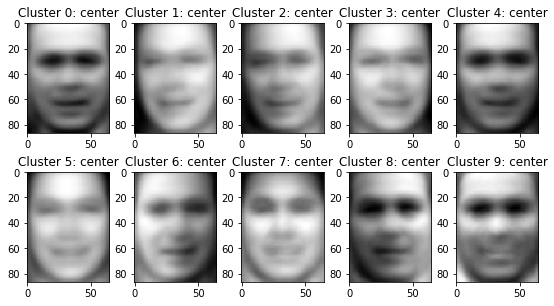

In [37]:
#Reconstruct the cluster centers for each of the K clusters
cluster_center_recon = []

for c in range(len(k_rand_vecs)):
    
    #reconstruct by rotating back into Euclidean space
    Pc_cluster_recon = updated_centroids[c] @ W.T

    #unstandardize the vector
    Pc_cluster_recon = Pc_cluster_recon * X_sigma + X_mu

    #reshape the image to be dimensions 87x65
    Pc_cluster_recon = np.reshape(Pc_cluster_recon, (87,65))
    
    #append reconstructed cluster center image to cluster_center_recon list
    cluster_center_recon.append(Pc_cluster_recon)

#plot the centers
_= plt.subplots_adjust(bottom=0, left=.1, right=1.3, top=.90, hspace=.35)
for i in range(len(cluster_center_recon)):
    _= plt.subplot(2, 5, i+1)
    _= plt.imshow(cluster_center_recon[i], cmap=cm.gray)
    _= plt.title("Cluster " + str(i) + ": center")


#### Find the closest and furthest images from center in each cluster

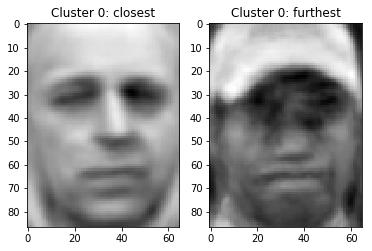

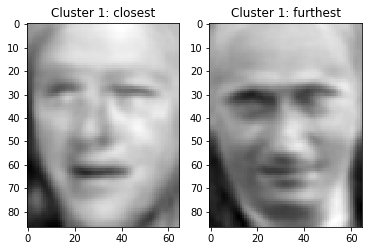

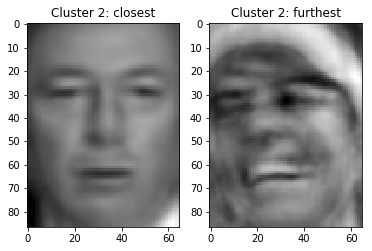

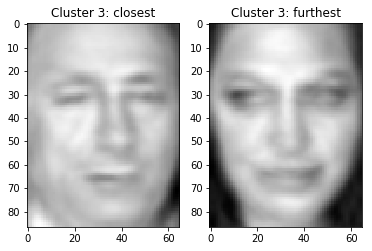

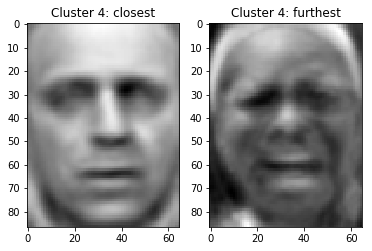

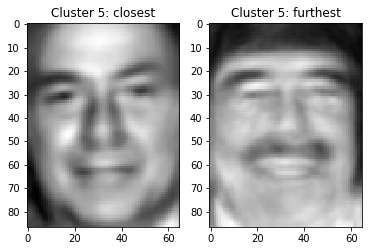

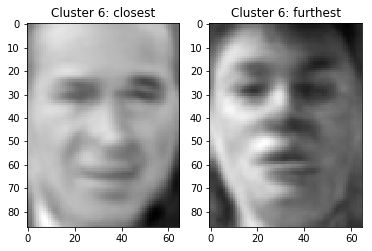

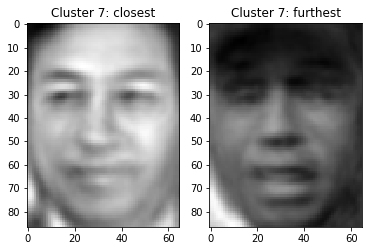

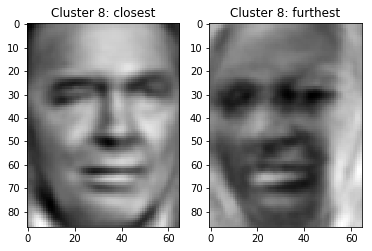

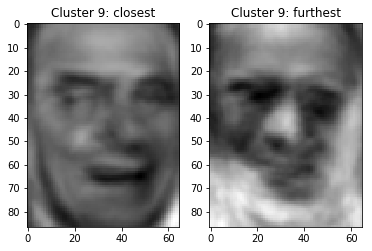

In [38]:
#Find the image closest to the cluster center, and furthest from the cluster center and report these images
for c in range(len(updated_centroids)):
    
    #get the images and centroid in each cluster
    cluster_images = Z[center_class == c]
    cluster_centroid = updated_centroids[c]
    
    #create empty list to store tuple values (indx, dist)
    image_indx_dist = []
    
    for indx, image in enumerate(cluster_images):
        
        #compute the distance between the images of the cluster and the centroid
        dist = Compute_L2_Distance(image, cluster_centroid)
        
        #append the index and distances
        image_indx_dist.append((indx, dist))
        
    #sort the list by distance in decending order
    image_indx_dist.sort(key = lambda x : x[1], reverse=True)
        
    #find the closest and furthest images indices from the centroid
    close_image = image_indx_dist[-1][0]
    far_image = image_indx_dist[0][0]
    
    #grab the closest and furthest images associated to the indexes found above
    closest = cluster_images[close_image]
    furthest = cluster_images[far_image]
    
    #plot the resulting images for each cluster class for the closest and furthest images
    _= plt.subplot(1, 2, 1)
    euclidean_image = closest @ W.T #transform back to euclidean space (i.e. eigen space --> euclidean space)
    euclidean_image = euclidean_image * X_sigma + X_mu #unstandardize the data
    _= plt.imshow(euclidean_image.reshape(87,65), cmap=plt.cm.gray)
    _= plt.title("Cluster {}: closest".format(c))

    _= plt.subplot(1, 2, 2)
    euclidean_image = furthest @ W.T #transform back to euclidean space (i.e. eigen space --> euclidean space)
    euclidean_image = euclidean_image * X_sigma + X_mu #unstandardize the data
    _= plt.imshow(euclidean_image.reshape(87,65), cmap=plt.cm.gray)
    _= plt.title("Cluster {}: furthest".format(c))

    _= plt.show()

In [39]:
#compute the stop time
stop = timeit.default_timer()

#return the notebook runtime to the screen
print('Notebook Total Runtime: ' + str((stop - start)/60) + ' minutes')

Notebook Total Runtime: 9.280444911666667 minutes
